# Heart Disease Prediction
(Kaggle Dataset)

We will be working on a kaggle dataset (https://www.kaggle.com/code/andls555/heart-disease-prediction/data) with data on the presence of HeartDisease based on 18 variables. We will be performing the following on this data:
* **Exploratory Data Analysis**
* **Data Preprocessing**
    * Missing Value Analysis
    * Duplicates
    * Outlier Analysis
    * Feature Selection
    * Encoding
    * Standardization
    * Test Train Split
    * Class Balancing
* **Model Development**
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Naive Bayes
    * K-Nearest Neighbours
    * Support Vector Machine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

# Exploratory Data Analysis (EDA)

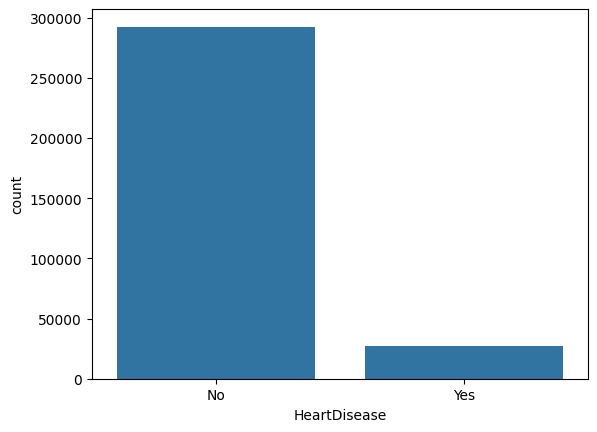

In [7]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [8]:
print("Ratio of count of class 'No' to class 'Yes':", len(df[df['HeartDisease']=='No'])/len(df[df['HeartDisease']=='Yes']))

Ratio of count of class 'No' to class 'Yes': 10.682862674898622


Clearly the target variable, *HeartDisease*, has extremely unbalanced class frequencies. This suggests the need to employ balancing techniques before we make our model.

In [9]:
continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


## Exploring continuous variables

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


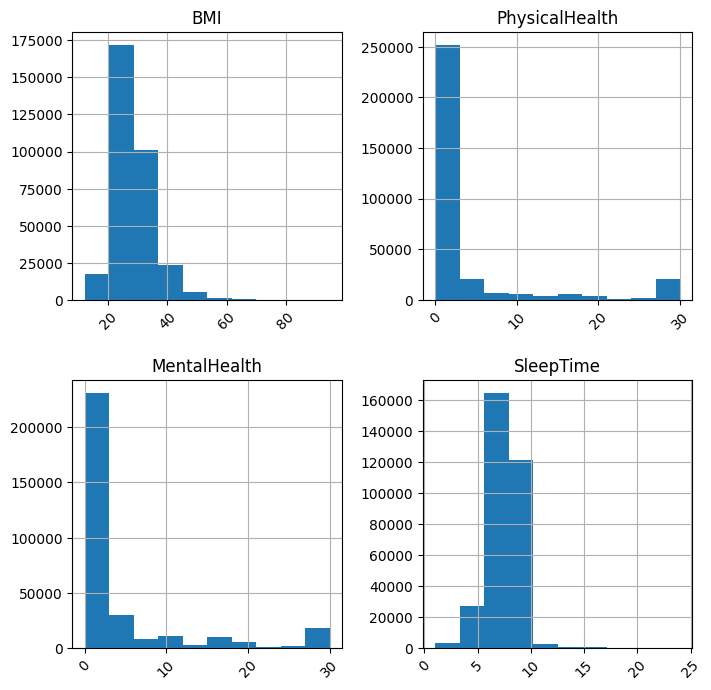

In [11]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

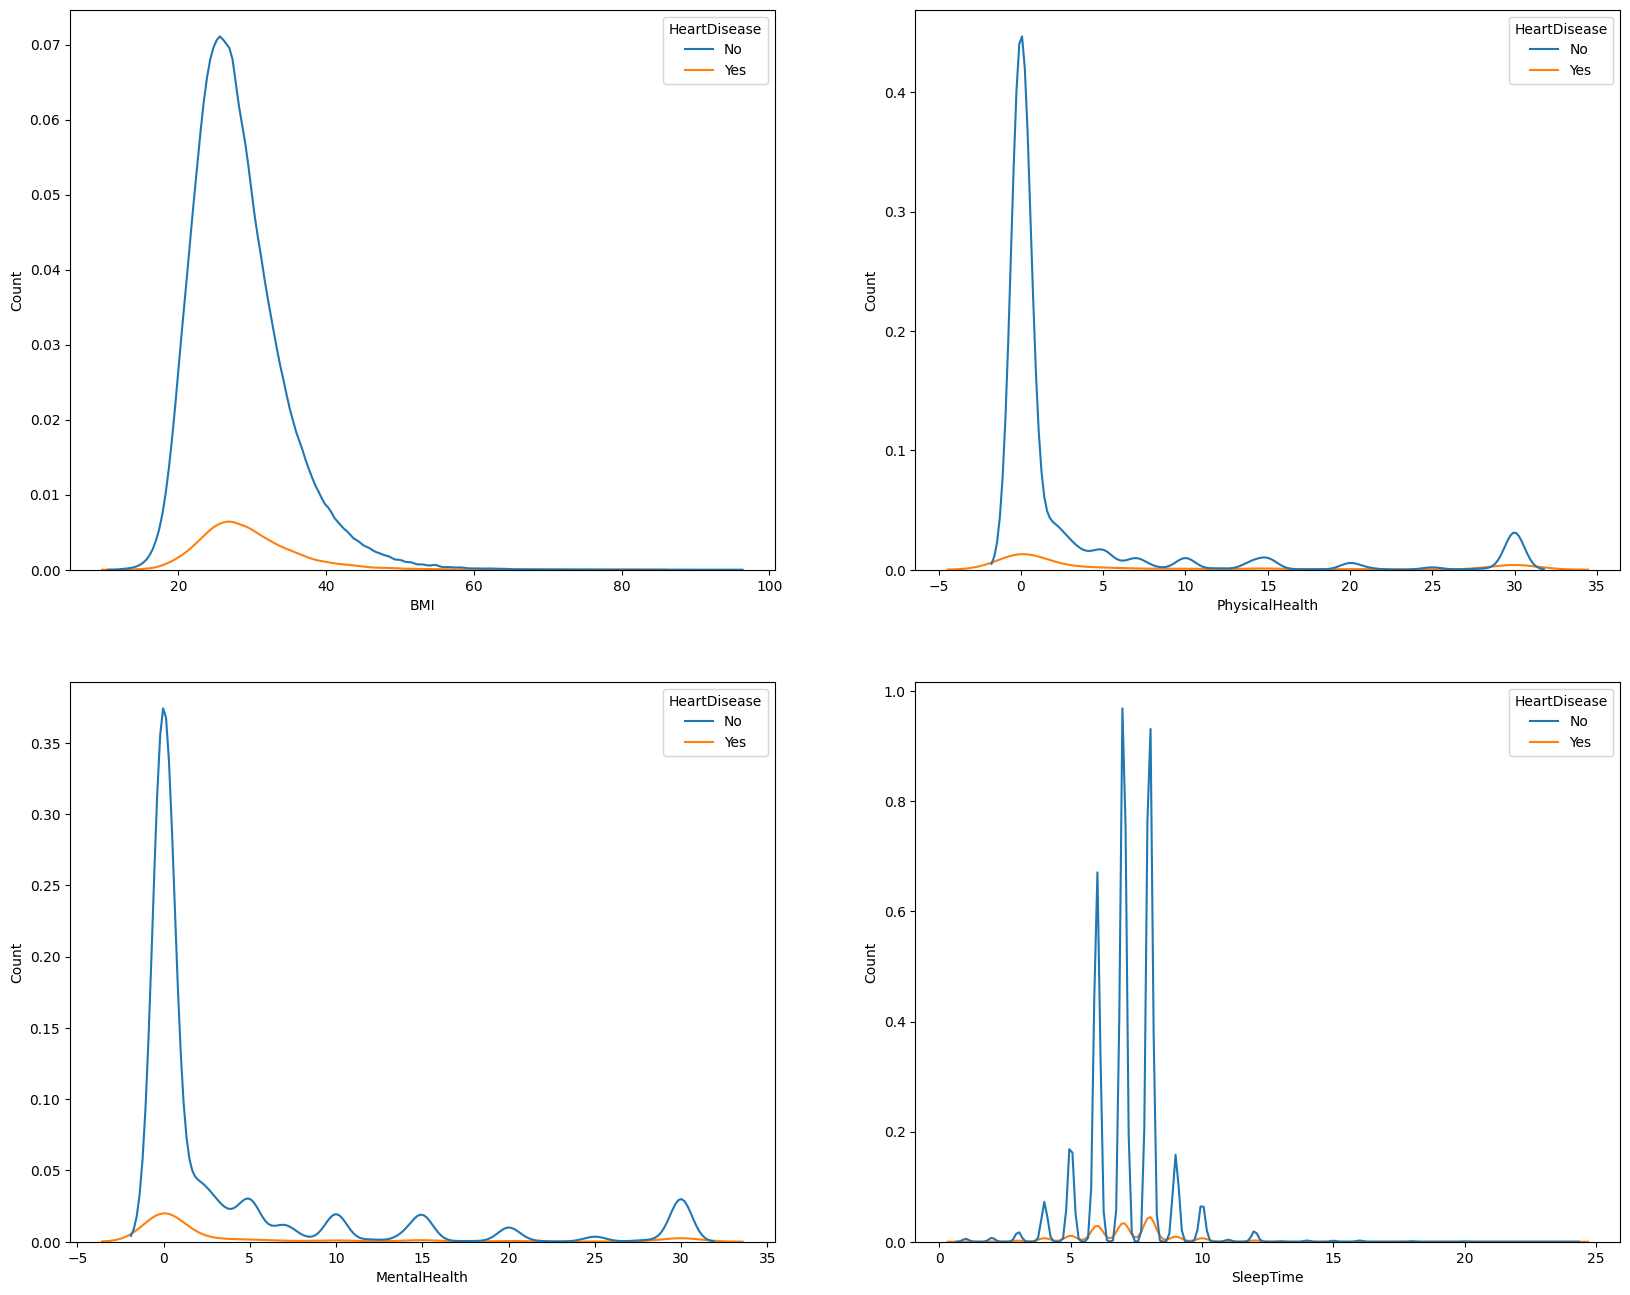

In [12]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.kdeplot(x=col,hue='HeartDisease',data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

*BMI* and *SleepTime* have close to a normal distribution whereas the same can not be seen in *PhysicalHealth* and *MentalHealth*

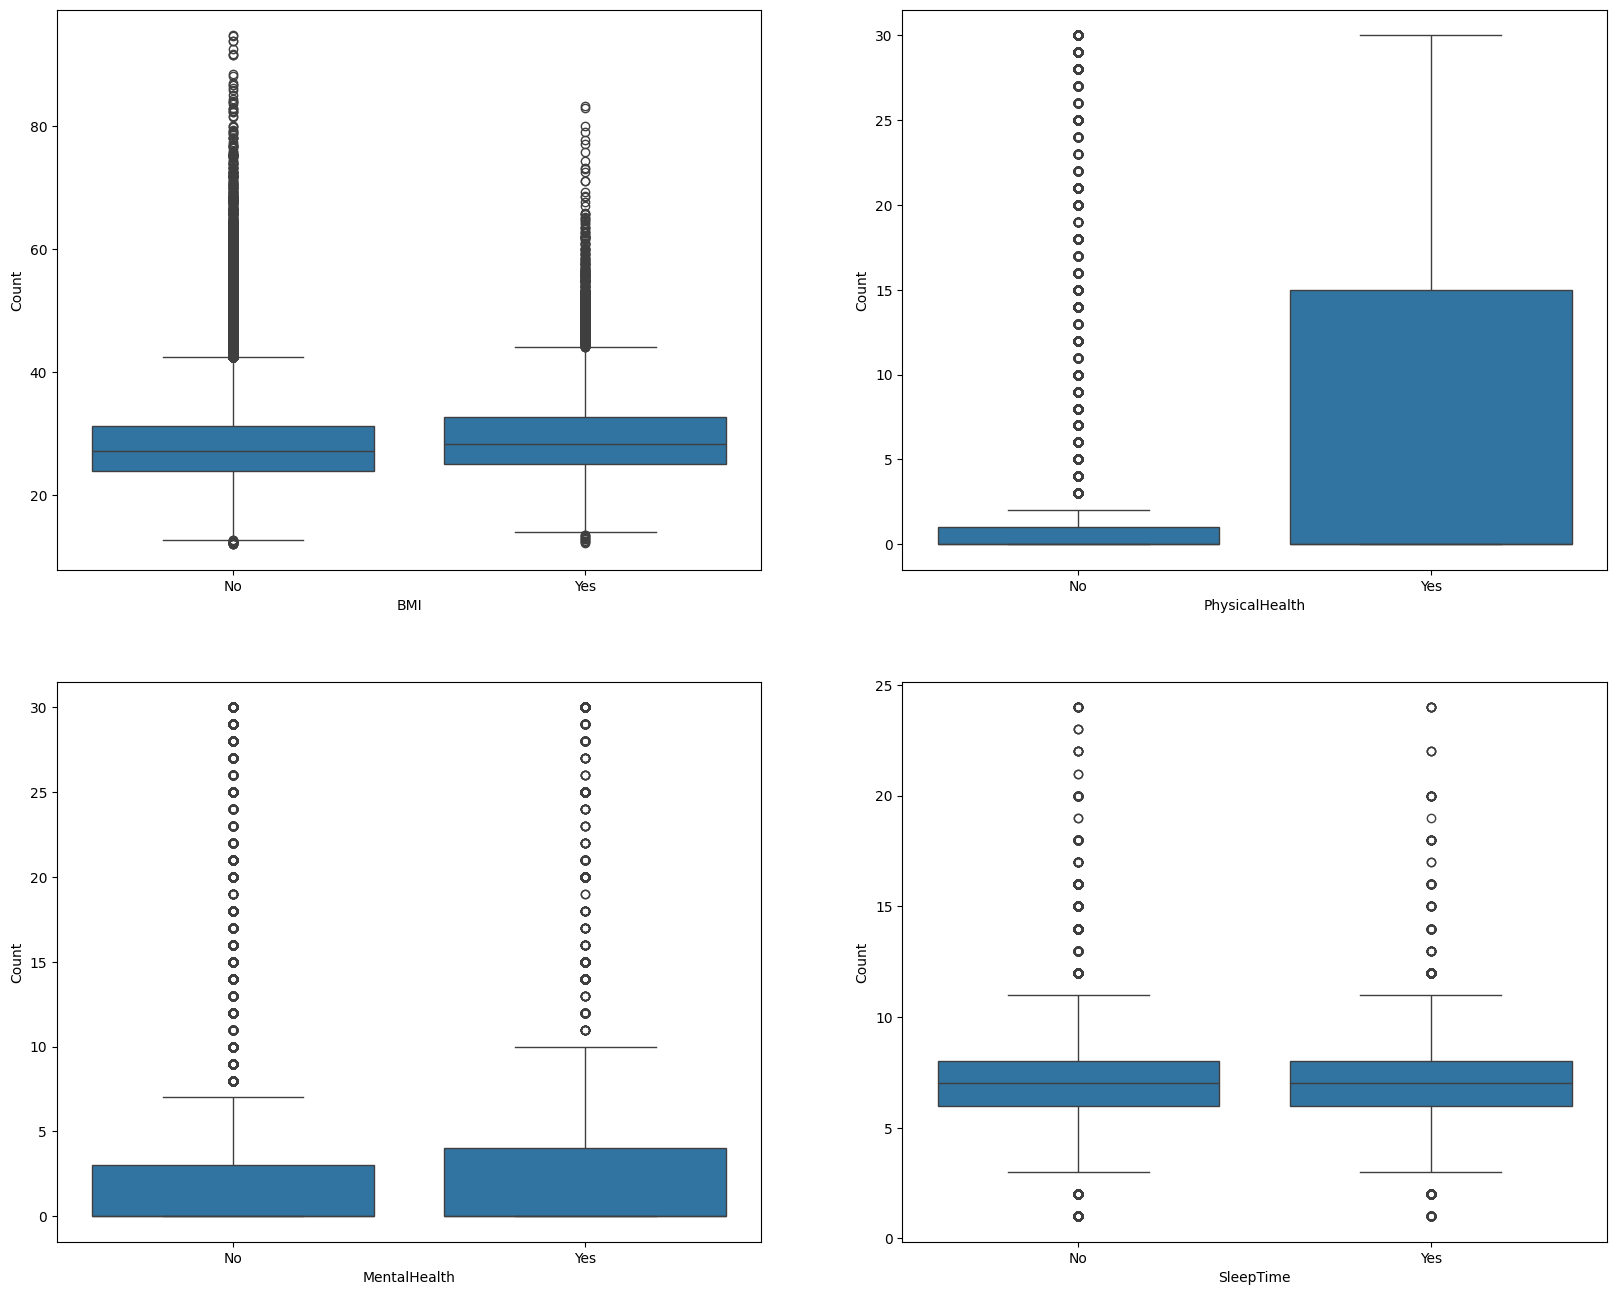

In [13]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

Continuous data has presence of outliers, must be dealt with in preprocessing

## Exploring categorical variables

In [14]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


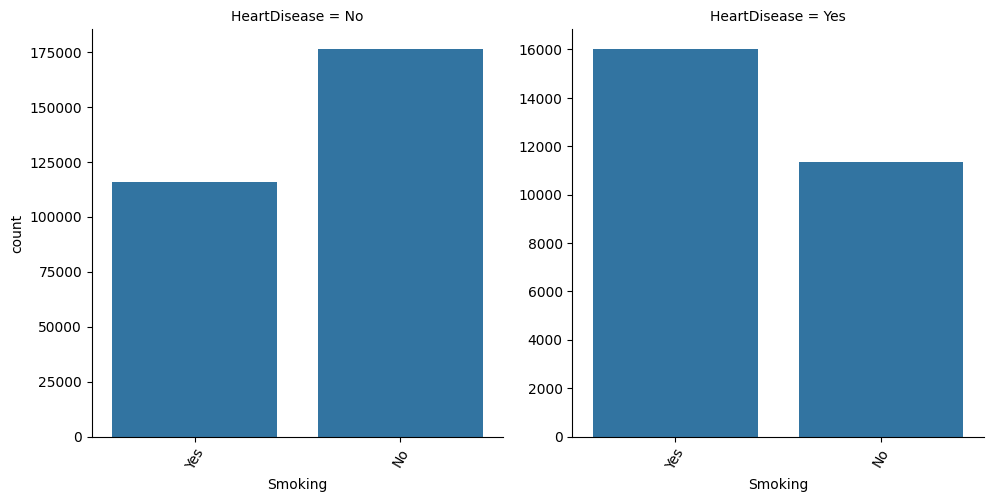

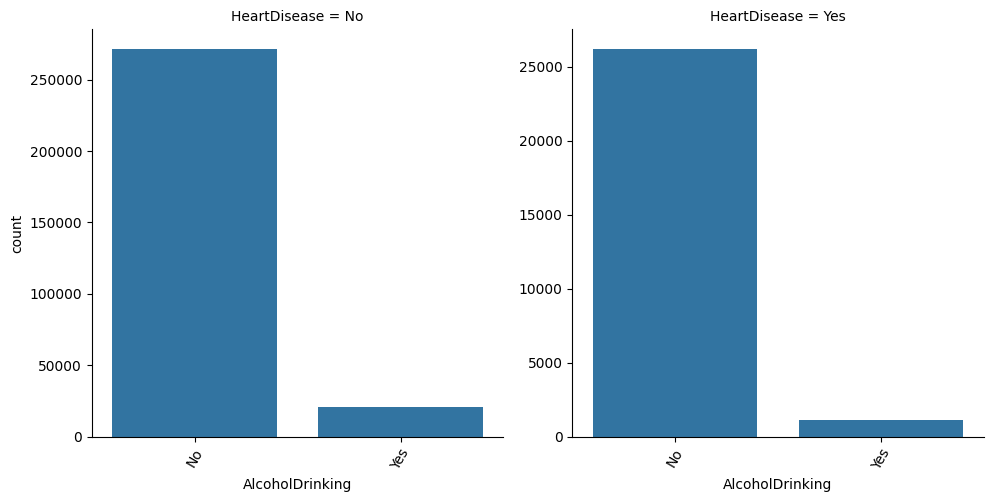

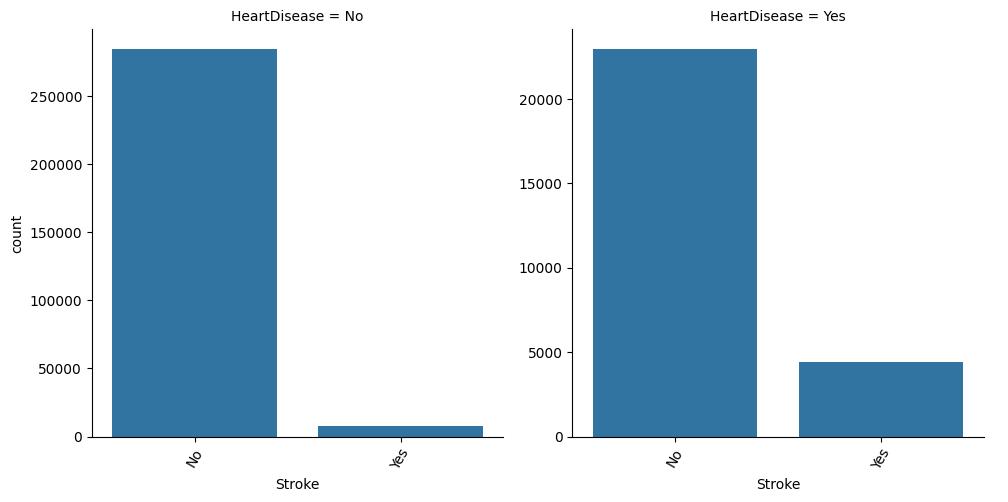

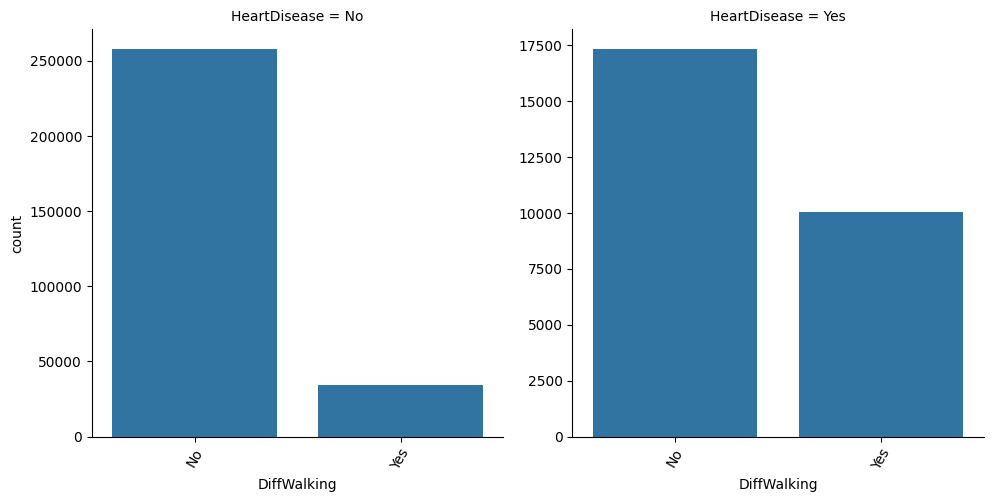

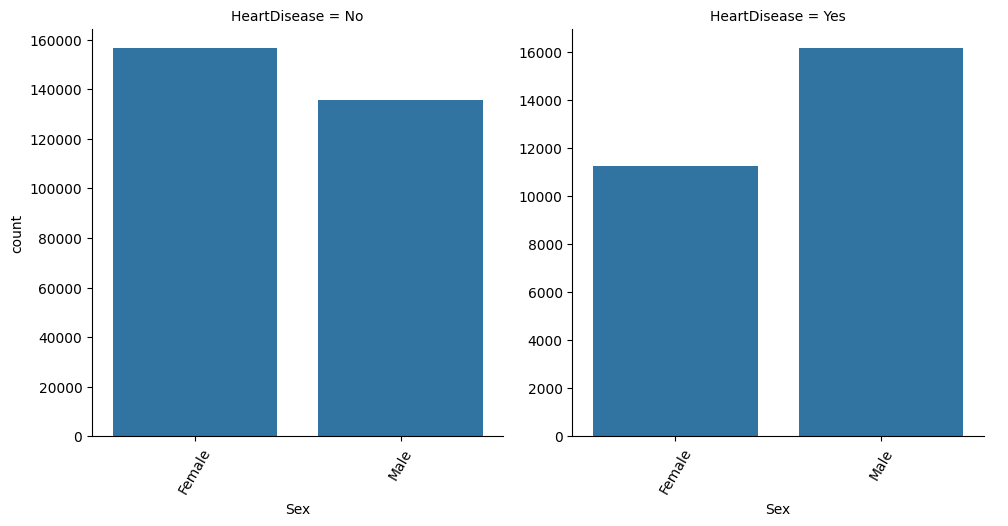

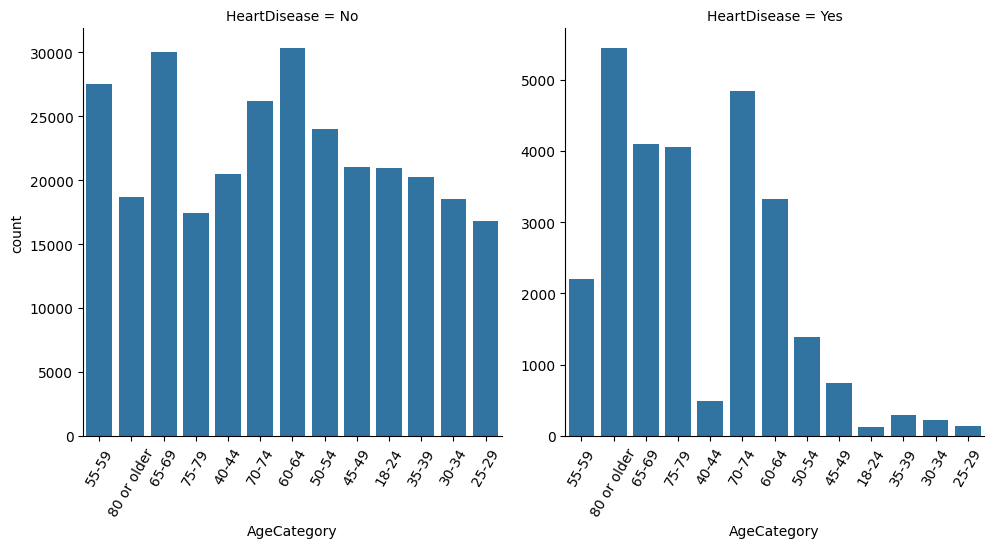

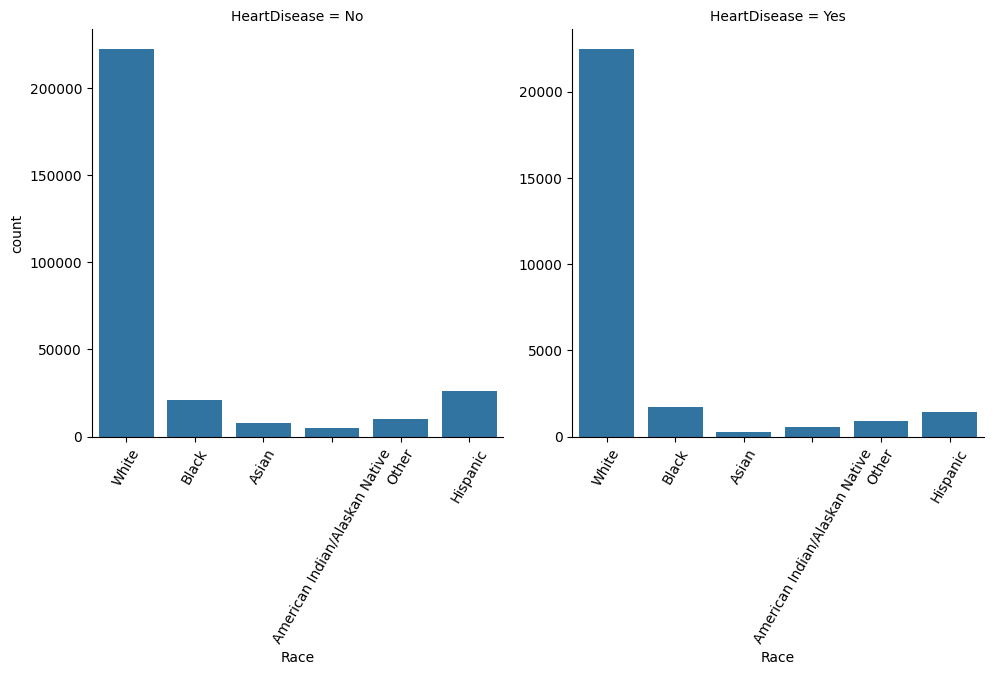

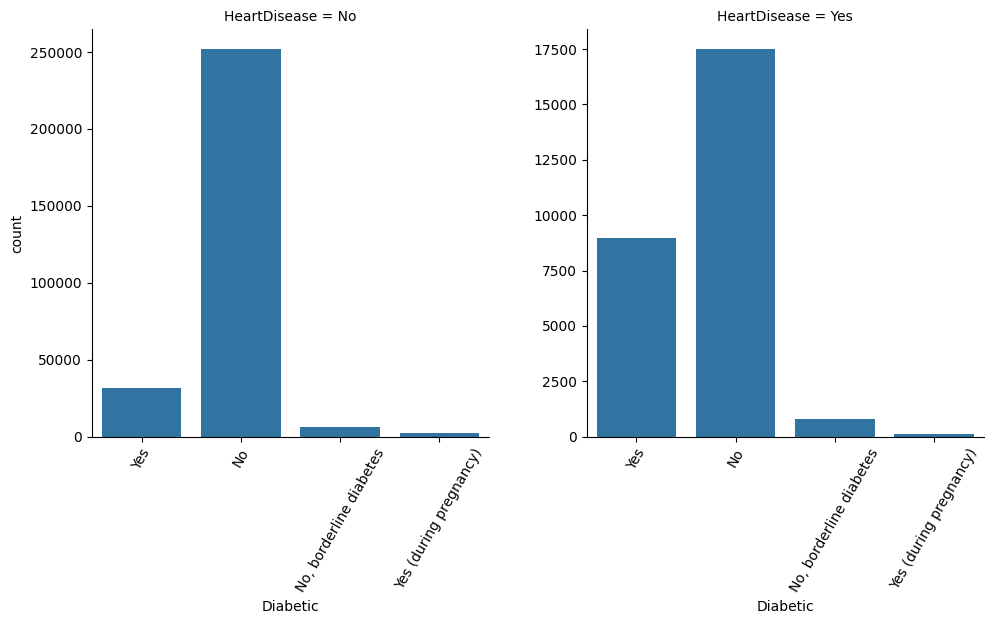

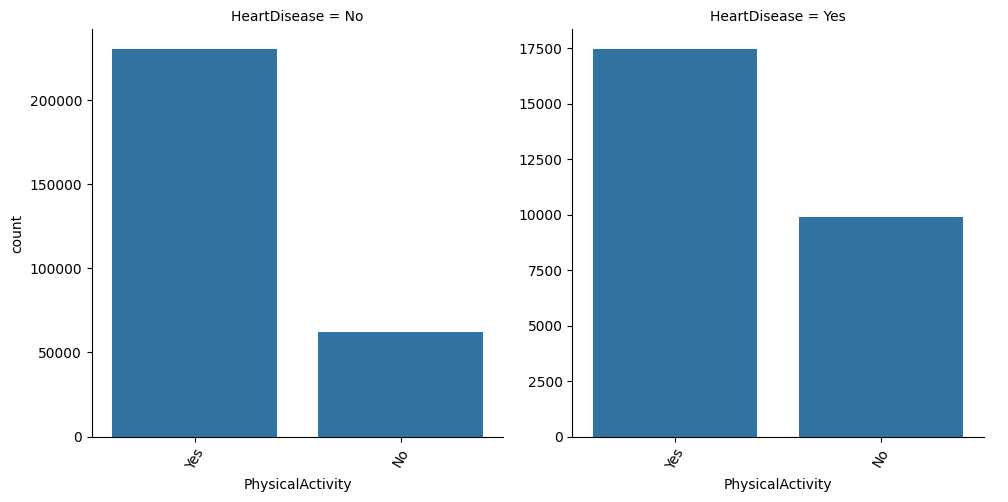

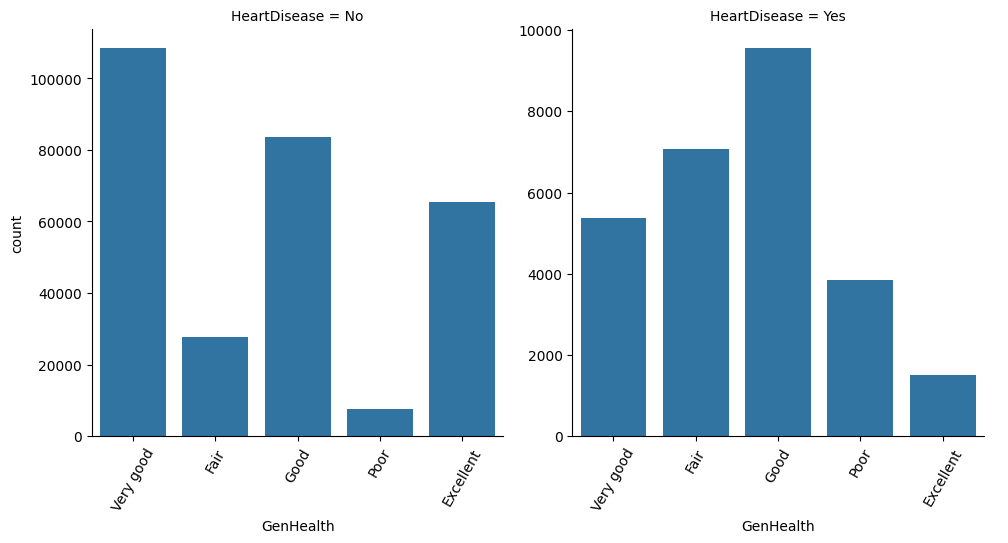

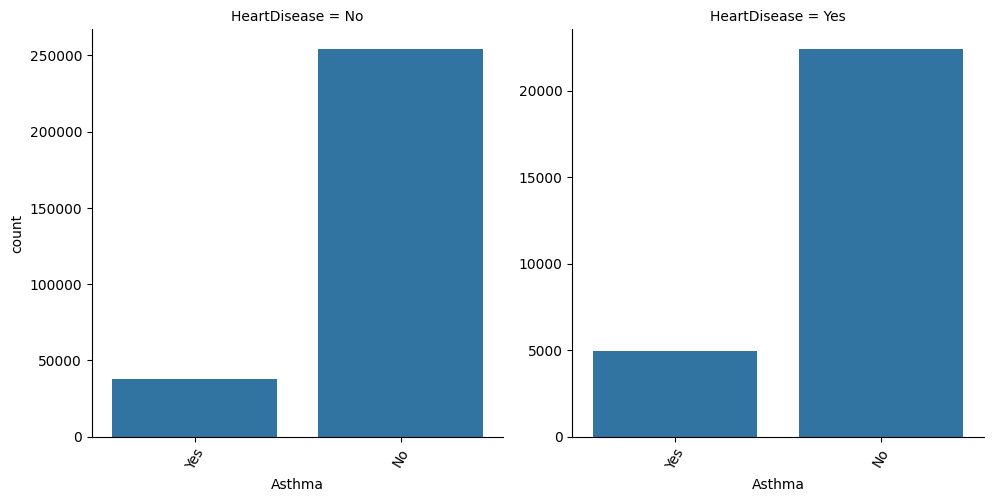

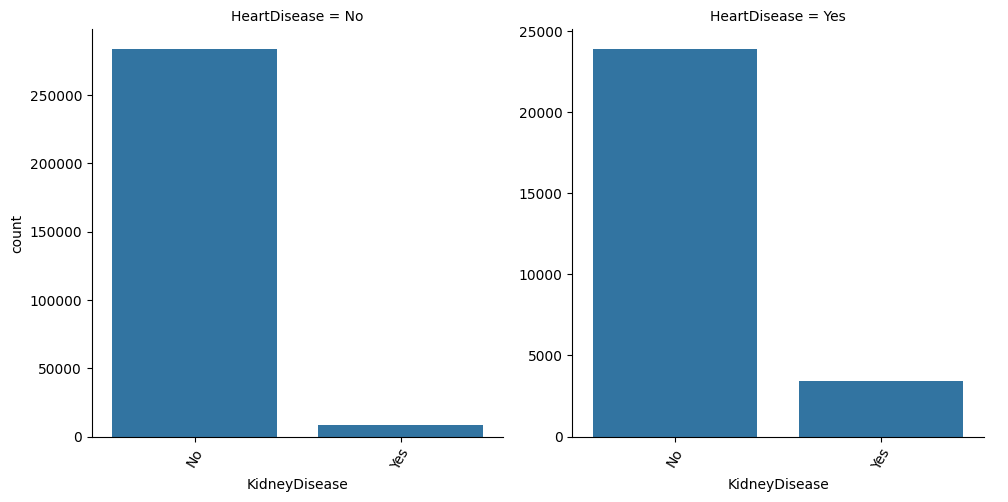

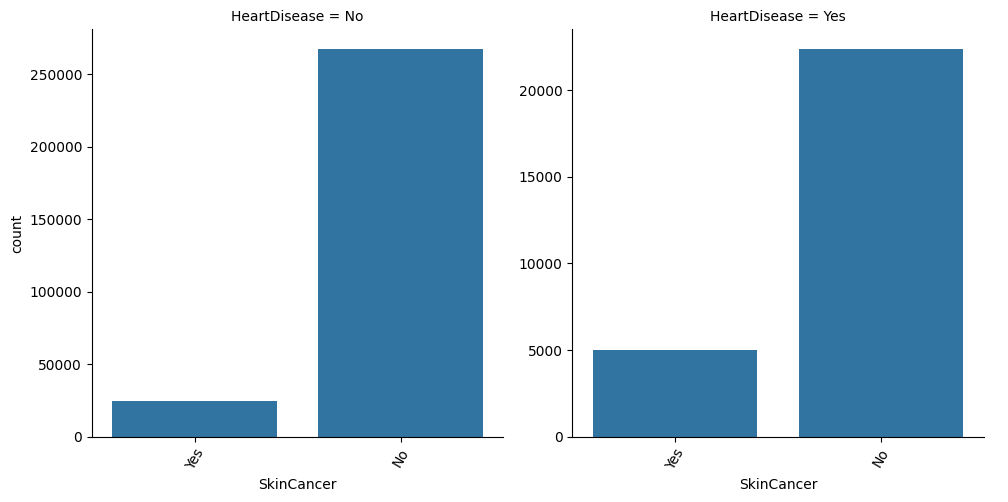

In [15]:
for col in categorical_vars[1:]:
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

* **Smoking**: We can see that the composition of the subset of population with HeartDisease has a higher proportion of smokers.
* Alcohol Drinking: The distribution of Yes/No is almost the same in both sets with and without HeartDisease.
* **Stroke**: It is clear that the population with HeartDisease has a higher proportion of people who have had a stroke, which suggests a correlation between the two.
* **DiffWalking**: There are a higher number of people who have Difficulty Walking with HeartDisease as opposed to those who do not.
* **Sex**: It appears that Males make up a higher proportion of the population with HeartDisease
* **AgeCategory**: We see that the occurences of HeartDisease are more common in older age groups
* Race: The distribution of Race with respect to HeartDisease is nearly the same, suggesting weak correlation
* **Diabetic**: There is a higher proportion of diabetics in subset of people with HeartDisease
* **PhysicalActivity**: There are more physically inactive people with HeartDisease as compared to physically active people
* **GenHealth**: People without HeartDisease have better General Health than those with HeartDisease
* Asthma: The distribution for with/without HeartDisease is almost the same, suggesting weak correlation
* **KidneyDisease**: There is a bigger fraction of people with KidneyDisease and HealthDisease as compared to those without HeartDisease
* **SkinCancer**: There is a bigger fraction of people with SkinCancer and HealthDisease as compared to those without HeartDisease

# Data Preprocessing

## 1. Missing Value Analysis

In [16]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No missing values found

## 2. Duplicates

In [17]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (319795, 18)
Duplicates in dataset: 18078


Duplicates found, we will drop these rows

In [18]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (301717, 18)
Duplicates in dataset: 0


## 3. Outlier Analysis

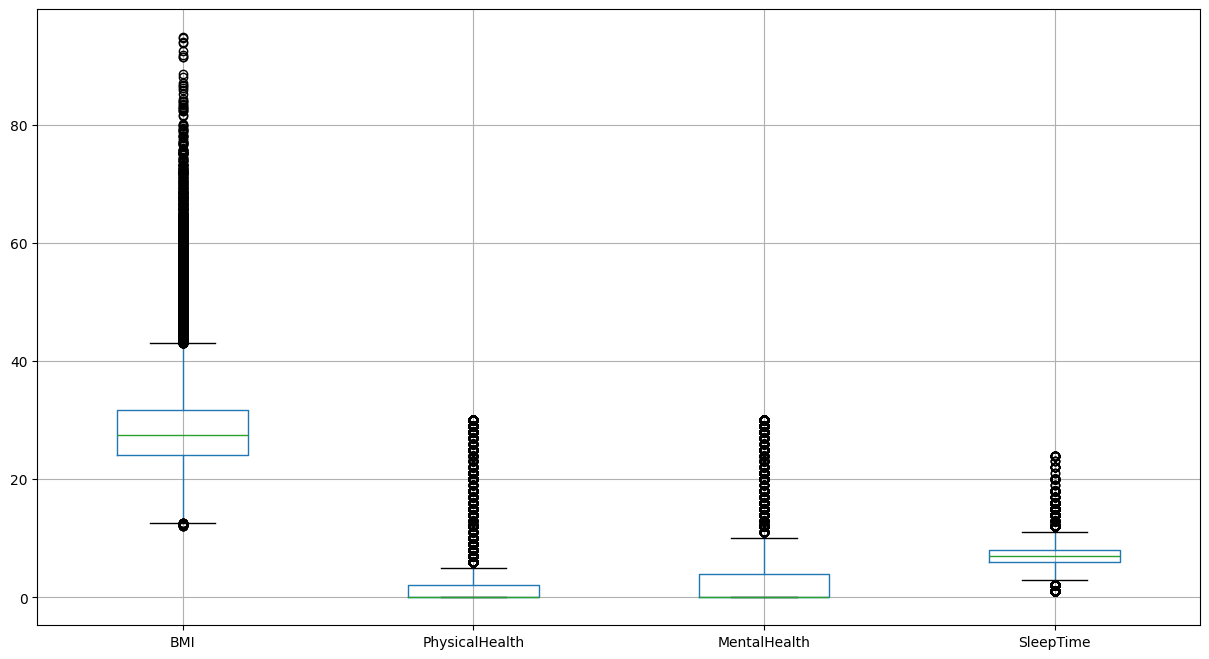

In [19]:
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_vars))
plt.show()

In [20]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [21]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: BMI
Upper Limit = 43.08
Lower Limit = 12.600000000000005
Percentage of Outliers= 2.9514412512387436
-------------------------------------------------- 

--------------------------------------------------
Column: PhysicalHealth
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 15.622586728623181
-------------------------------------------------- 

--------------------------------------------------
Column: MentalHealth
Upper Limit = 10.0
Lower Limit = -6.0
Percentage of Outliers= 13.162334240364315
-------------------------------------------------- 

--------------------------------------------------
Column: SleepTime
Upper Limit = 11.0
Lower Limit = 3.0
Percentage of Outliers= 1.5053841845172795
-------------------------------------------------- 



* For BMI and SleepTime, % of outliers is very low => can delete those records
* For PhysicalHeath and MentalHealth, % of outliers is too great to delete records

In [22]:
df.select_dtypes(include='float64').skew()

BMI               1.297737
PhysicalHealth    2.501000
MentalHealth      2.237470
SleepTime         0.697224
dtype: float64

PhysicalHealth and MentalHealth are greately positively skewed => can apply log transformation

In [23]:
#dropping records for BMI and SleepTime outliers
for col in ['BMI', 'SleepTime']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['BMI', 'SleepTime'], inplace=True)
df.reset_index(drop=True, inplace=True)

#using log transformation for PhysicalHealth and MentalHealth
df[['PhysicalHealth','MentalHealth']] = np.log1p(df[['PhysicalHealth','MentalHealth']])

In [24]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1.386294,3.433987,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,3.044522,3.433987,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,3.367296,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,No,No,No,0.000000,0.000000,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,No,22.22,No,No,No,0.000000,0.000000,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,Yes,27.41,Yes,No,No,2.079442,0.000000,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,No,29.84,Yes,No,No,0.000000,0.000000,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


Skewness has been reduced for all 4 features

## 4. Feature Selection

### 4.1 Continuous Features

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.075499      0.015184  -0.055475
PhysicalHealth  0.075499        1.000000      0.266002  -0.098170
MentalHealth    0.015184        0.266002      1.000000  -0.148908
SleepTime      -0.055475       -0.098170     -0.148908   1.000000


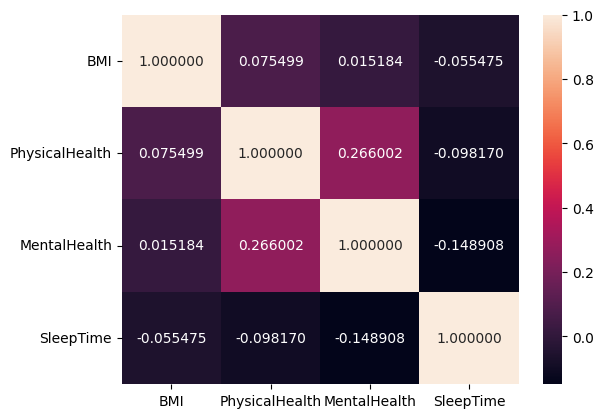

In [25]:
df_corr=df.select_dtypes(include='float64').corr()
print(df_corr)
sns.heatmap(df_corr, annot=True, fmt="f")
plt.show()

This shows that PhysicalHealth and MentalHealth are related. However, none of these values are high enough to drop a feature altogether.

### 4.2 Categorical Features

In [26]:
from scipy.stats import chi2_contingency

for col in categorical_vars[1:]:
    data_crosstab = pd.crosstab(df['HeartDisease'], df[col],)
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        result="There is a significant association between these varibles "
    else:
        result="There is no association those varibles"
    print('--> P-value is',p,"\n-->",result,"\n")

Smoking           No     Yes
HeartDisease                
No            156499  106469
Yes            10565   14963

 

--> P-value is 0.0 
--> There is a significant association between these varibles  

AlcoholDrinking      No    Yes
HeartDisease                  
No               243074  19894
Yes               24466   1062 

--> P-value is 5.510264590614576e-89 
--> There is a significant association between these varibles  

Stroke            No   Yes
HeartDisease              
No            255768  7200
Yes            21523  4005 

--> P-value is 0.0 
--> There is a significant association between these varibles  

DiffWalking       No    Yes
HeartDisease               
No            232543  30425
Yes            16650   8878 

--> P-value is 0.0 
--> There is a significant association between these varibles  

Sex           Female    Male
HeartDisease                
No            141278  121690
Yes            10319   15209 

--> P-value is 0.0 
--> There is a significant association between these varibles  

AgeCategory   18-24  25-29  30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
HeartDi

All the features have significant assoication with the target variable (HeartDisease), hence can not be dropped

## 5. Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,1.386294,3.433987,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,3.044522,3.433987,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,3.367296,0.000000,1,0,4,5,0,1,4,8.0,0,0,0


## 5. Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,0.707383,2.325916,0,0,7,5,2,1,4,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.571605,-0.678373,0,0,12,5,0,1,4,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.237255,2.325916,0,1,9,5,2,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.571605,-0.678373,0,0,11,5,0,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,2.535044,-0.678373,1,0,4,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,-0.825033,0,0,0,-0.571605,-0.678373,0,0,8,3,0,1,0,-0.839007,0,0,0
288492,0,-1.040602,0,0,0,-0.571605,-0.678373,0,0,0,3,0,1,0,0.755547,0,0,0
288493,1,-0.076115,1,0,0,1.346876,-0.678373,1,1,8,3,2,0,1,-0.839007,1,0,0
288494,0,0.375465,1,0,0,-0.571605,-0.678373,0,1,3,3,0,1,4,-1.636283,1,0,0


## 6. Test Train Split

In [34]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [35]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.271038,0,0,0,-0.571605,-0.678373,0,0,12,5,0,1,4,0.755547,0,0,1
1,0,1.328802,0,0,0,-0.571605,-0.678373,0,1,7,5,0,1,2,0.755547,0,0,0
2,0,-0.310268,1,0,0,1.223681,-0.678373,0,1,9,3,0,1,0,1.552824,0,0,0
3,0,-0.786007,1,0,0,1.081462,0.889182,0,0,9,5,0,1,1,-0.041730,1,0,0
4,0,1.763658,1,0,0,2.596573,2.325916,0,0,6,5,0,1,1,-1.636283,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230791,1,-1.588817,1,0,1,-0.571605,-0.678373,0,0,11,5,0,1,2,0.755547,1,0,0
230792,0,0.756429,0,0,1,-0.571605,-0.678373,0,0,9,2,2,0,4,-0.839007,0,0,0
230793,0,-1.072194,1,0,1,2.596573,-0.678373,1,1,7,2,0,0,3,-0.839007,0,0,0
230794,0,-1.120512,0,1,0,-0.571605,-0.678373,0,0,3,5,0,1,0,-0.041730,0,0,0


In [36]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,1.287919,0,1,0,-0.571605,2.325916,0,0,8,5,0,1,4,0.755547,0,0,0
1,0,0.317856,0,0,0,-0.571605,0.282769,0,1,2,5,0,1,4,0.755547,0,0,0
2,0,-0.890075,0,0,0,-0.571605,-0.678373,0,0,5,5,0,1,4,-0.041730,0,0,1
3,0,-0.169033,0,0,0,-0.571605,0.534453,0,1,7,5,0,1,4,-0.041730,0,0,0
4,1,-0.369736,1,0,0,-0.571605,-0.678373,1,1,12,5,2,1,1,-1.636283,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57695,0,1.968077,0,0,0,-0.571605,0.534453,0,0,6,5,0,1,0,-0.041730,0,0,0
57696,0,-0.637339,0,1,0,-0.571605,0.282769,0,1,0,5,0,1,0,-1.636283,0,0,0
57697,1,-0.509112,1,0,0,0.067889,-0.678373,0,1,11,5,0,1,2,1.552824,0,1,0
57698,0,1.211726,1,0,0,-0.571605,-0.678373,1,0,9,0,0,1,2,-1.636283,0,0,0


## 7. Class Balancing

In [37]:
# class count
class_count_0, class_count_1 = training_data['HeartDisease'].value_counts()

# Separate class
class_0 = training_data[training_data['HeartDisease'] == 0]
class_1 = training_data[training_data['HeartDisease'] == 1]

print('Class 0 [HeartDisease = No]:', class_0.shape)
print('Class 1 [HeartDisease = Yes]:', class_1.shape)

Class 0 [HeartDisease = No]: (210405, 18)
Class 1 [HeartDisease = Yes]: (20391, 18)


**Following are some of the methods to balance the data:**
* Random under-sampling
* Random over-sampling
* Under-sampling with Tomek links 
* Synthetic Minority Over-sampling Technique (SMOTE)
* NearMiss

In [38]:
x = training_data.drop(['HeartDisease'], axis=1)
y = training_data['HeartDisease'] 

### 7.1 Random Under-sampling

Total counts of class 1 and 0:
HeartDisease
0    20391
1    20391
Name: count, dtype: int64


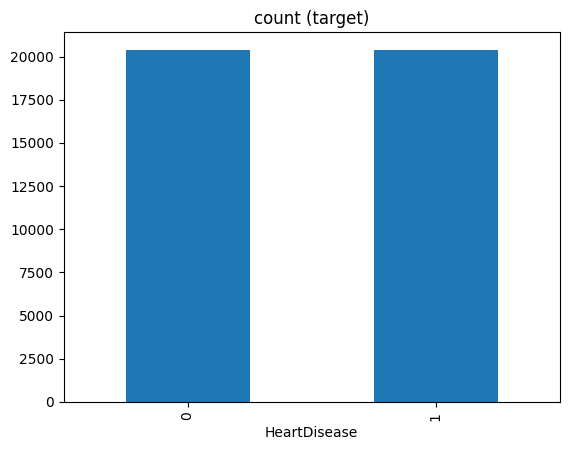

In [39]:
# taking sample from class_0 such that both have the quantity of minority class, i.e. class_1
class_0_under = class_0.sample(class_count_1)

training_data_1= pd.concat([class_0_under, class_1], axis=0)

# plot the count after under-sampling
print("Total counts of class 1 and 0:")
print(training_data_1['HeartDisease'].value_counts())
training_data_1['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

### 7.2 Random Over-sampling

Total counts of class 1 and 0:
HeartDisease
1    210405
0    210405
Name: count, dtype: int64


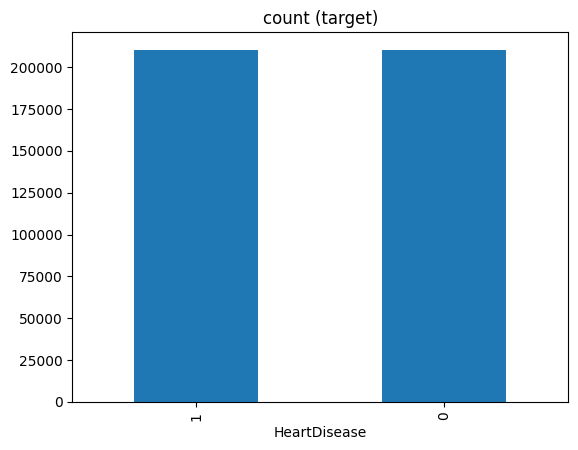

In [40]:
# taking sample from class_1 such that both have the quantity of majority class, i.e. class_0
class_1_over = class_1.sample(class_count_0, replace=True)

training_data_2 = pd.concat([class_1_over, class_0], axis=0)

# plot the count after over-sampling
print("Total counts of class 1 and 0:")
print(training_data_2['HeartDisease'].value_counts())
training_data_2['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

### 7.3 Under-sampling with Tomek links

### 7.4 SMOTE (Synthetic Minority Over-sampling Technique)

### 7.5 NearMiss

# Model Development

In this case, we have a supervised ML problem statement, falling into the classification group. This suggests using the following models:
* **Logistic Regression**
* **Decision Tree**
* **Random Forest**
* **Naive Bayes**
* **K-Nearest Neighbour (KNN)**
* **Support Vector Machine (SVM)**

* If we assess that errors caused by FPs are more undesirable, then we will select a model based on precision 
    * (Precision: Of all positive predictions, how many are really positive?)
* If we assess that errors caused by FNs are more undesirable, then we will select a model based on recall 
    * (Recall: Of all real positive cases, how many are predicted positive?)
* If we assess that both types of errors are undesirable, then we will select a model based on F1-score

In our case, leaving a patient with an undiagonsed condition of HeartDisease is more undesirable (i.e. FNs), hence **we will select model based on Recall**

In [41]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']

X_train1 = training_data_1.drop(['HeartDisease'], axis=1)
y_train1 = training_data_1['HeartDisease']

X_train2 = training_data_2.drop(['HeartDisease'], axis=1)
y_train2 = training_data_2['HeartDisease']



X_train_list = [X_train, X_train1, X_train2]
y_train_list = [y_train, y_train1, y_train2]
data_desc = ['Imbalanced', 'Random Under-sampling', 'Random Over-sampling', 'Tomek', 'SMOTE', 'NearMiss']

## Logistic Regression

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9125
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52563
           1       0.55      0.09      0.15      5137

    accuracy                           0.91     57700
   macro avg       0.74      0.54      0.55     57700
weighted avg       0.89      0.91      0.88     57700

Confusion Matrix:


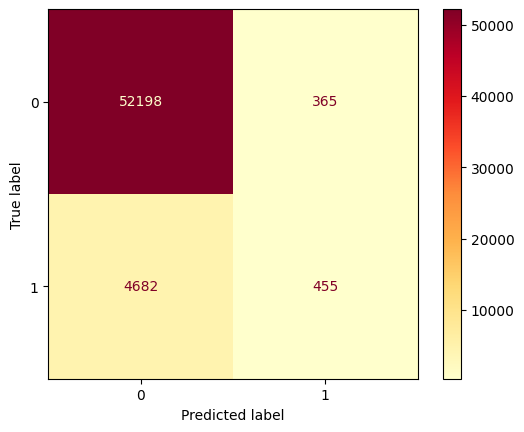

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7295
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52563
           1       0.21      0.76      0.33      5137

    accuracy                           0.73     57700
   macro avg       0.59      0.74      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


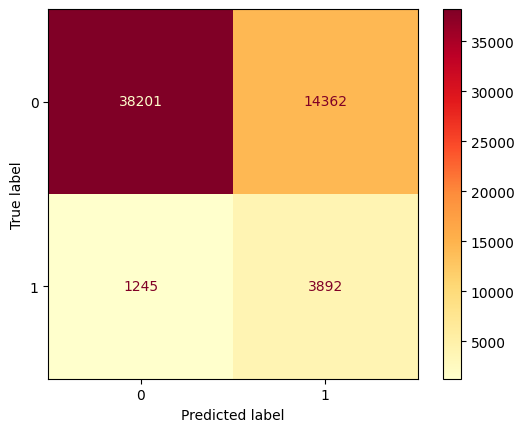

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7316
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52563
           1       0.21      0.75      0.33      5137

    accuracy                           0.73     57700
   macro avg       0.59      0.74      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


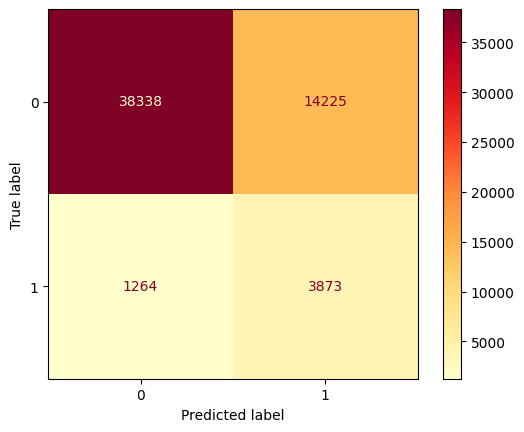

---------------------------------------------------------------------------


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

In [44]:
model_filename = f'logistic_regression.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf_LR, file)

Best result is with Random under/over-sampling which give recall=0.78 and accuracy=73%

## Decision Tree

---------------------------------------------------------------------------
Model with training data-0 (imbalanced):

Model accuracy score: 0.9116
Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52600
           1       0.00      0.00      0.00      5100

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Confusion Matrix:


C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


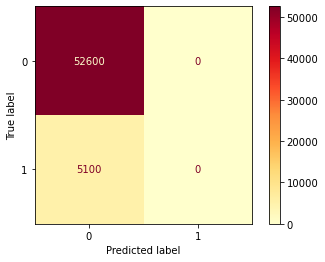

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.5645
Classification report:

              precision    recall  f1-score   support

           0       0.98      0.53      0.69     52600
           1       0.16      0.90      0.27      5100

    accuracy                           0.56     57700
   macro avg       0.57      0.72      0.48     57700
weighted avg       0.91      0.56      0.65     57700

Confusion Matrix:


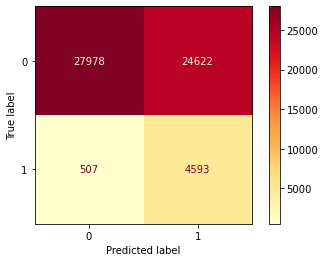

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.7166
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     52600
           1       0.20      0.71      0.31      5100

    accuracy                           0.72     57700
   macro avg       0.58      0.72      0.57     57700
weighted avg       0.90      0.72      0.78     57700

Confusion Matrix:


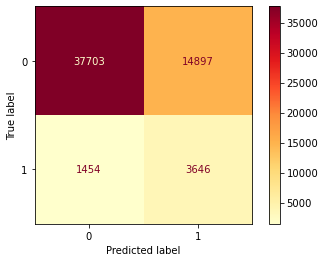

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (Tomek):

Model accuracy score: 0.9116
Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52600
           1       0.00      0.00      0.00      5100

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Confusion Matrix:


C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


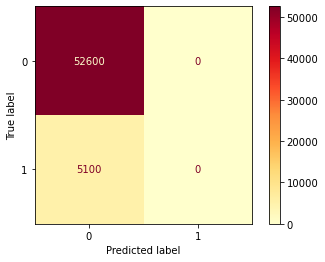

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (SMOTE):

Model accuracy score: 0.7218
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.83     52600
           1       0.20      0.71      0.31      5100

    accuracy                           0.72     57700
   macro avg       0.58      0.71      0.57     57700
weighted avg       0.89      0.72      0.78     57700

Confusion Matrix:


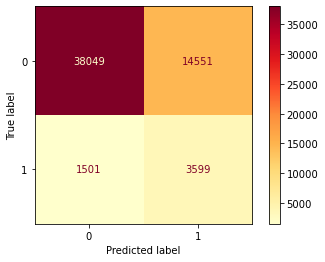

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-5 (NearMiss):

Model accuracy score: 0.5338
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.53      0.67     52600
           1       0.11      0.61      0.19      5100

    accuracy                           0.53     57700
   macro avg       0.52      0.57      0.43     57700
weighted avg       0.86      0.53      0.63     57700

Confusion Matrix:


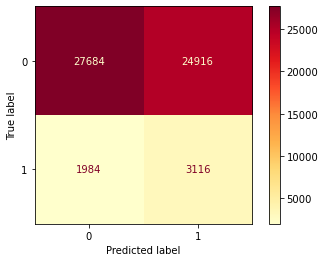

---------------------------------------------------------------------------


In [40]:
from sklearn.tree import DecisionTreeClassifier


for i in range(len(X_train_list)):
    print
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 
    clf_dtc.fit(X_t("---------------------------------------------------------------------------")rain_list[i], y_train_list[i])
        
    pred = clf_dtc.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

Best result is with Random Over-sampling & SMOTE which give recall=0.71 and accuracy=72%

## Random Forest

---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

Model accuracy score: 0.9008
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52563
           1       0.33      0.11      0.17      5137

    accuracy                           0.90     57700
   macro avg       0.62      0.54      0.56     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


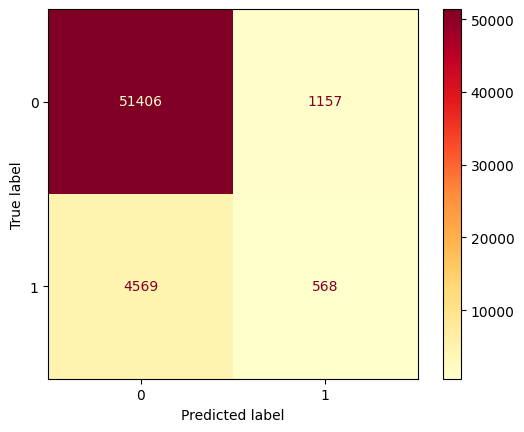

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.7133
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     52563
           1       0.20      0.76      0.32      5137

    accuracy                           0.71     57700
   macro avg       0.59      0.74      0.57     57700
weighted avg       0.90      0.71      0.77     57700

Confusion Matrix:


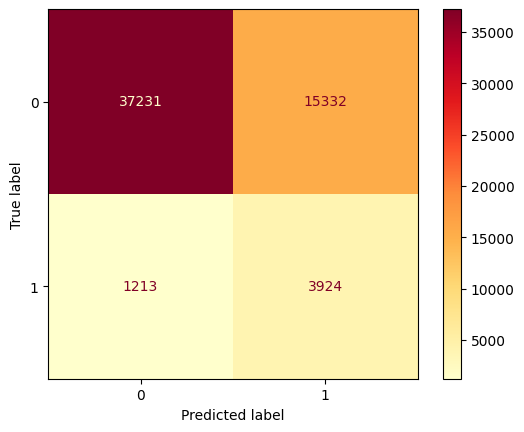

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.8865
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     52563
           1       0.30      0.20      0.24      5137

    accuracy                           0.89     57700
   macro avg       0.61      0.58      0.59     57700
weighted avg       0.87      0.89      0.88     57700

Confusion Matrix:


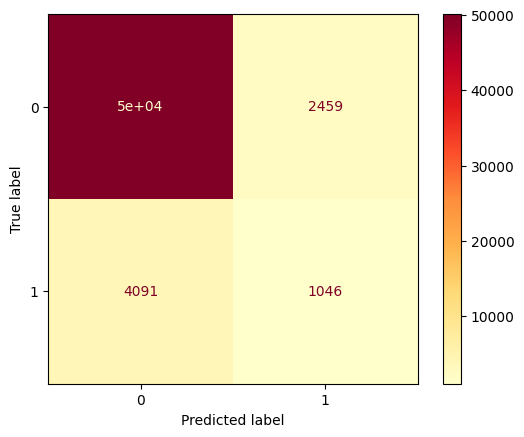

---------------------------------------------------------------------------


In [43]:
from sklearn.ensemble import  RandomForestClassifier


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])
        
    pred = clf_RF.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")


In [47]:
model_filename = f'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf_RF, file)

Best result is with Random Under-sampling which gives recall=0.70 and accuracy=71%

## Naive Bayes

---------------------------------------------------------------------------
Model with training data-0 (imbalanced):

Model accuracy score: 0.8473
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     52600
           1       0.28      0.45      0.34      5100

    accuracy                           0.85     57700
   macro avg       0.61      0.67      0.63     57700
weighted avg       0.88      0.85      0.86     57700

Confusion Matrix:


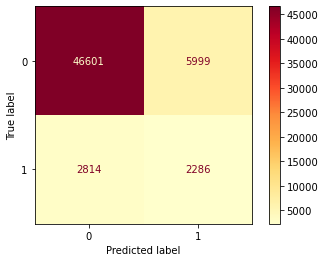

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.7849
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     52600
           1       0.23      0.61      0.34      5100

    accuracy                           0.78     57700
   macro avg       0.59      0.71      0.60     57700
weighted avg       0.89      0.78      0.82     57700

Confusion Matrix:


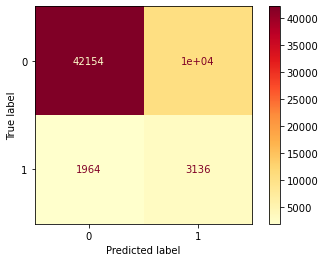

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.7852
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     52600
           1       0.23      0.62      0.34      5100

    accuracy                           0.79     57700
   macro avg       0.59      0.71      0.60     57700
weighted avg       0.89      0.79      0.82     57700

Confusion Matrix:


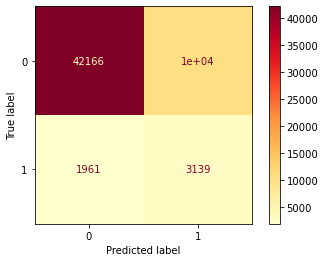

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (Tomek):

Model accuracy score: 0.8433
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     52600
           1       0.27      0.46      0.34      5100

    accuracy                           0.84     57700
   macro avg       0.61      0.67      0.63     57700
weighted avg       0.88      0.84      0.86     57700

Confusion Matrix:


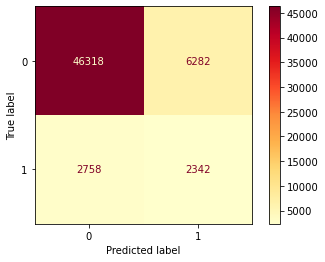

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (SMOTE):

Model accuracy score: 0.7162
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     52600
           1       0.20      0.72      0.31      5100

    accuracy                           0.72     57700
   macro avg       0.58      0.72      0.56     57700
weighted avg       0.90      0.72      0.78     57700

Confusion Matrix:


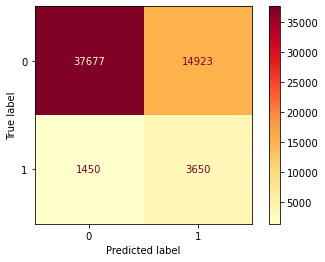

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-5 (NearMiss):

Model accuracy score: 0.3523
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.31      0.47     52600
           1       0.10      0.76      0.17      5100

    accuracy                           0.35     57700
   macro avg       0.51      0.54      0.32     57700
weighted avg       0.86      0.35      0.44     57700

Confusion Matrix:


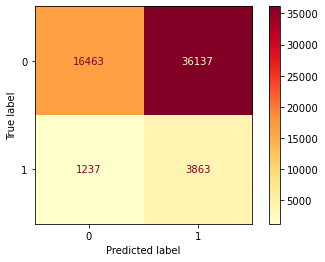

---------------------------------------------------------------------------


In [43]:
from sklearn.naive_bayes import GaussianNB

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_gnb = GaussianNB()
    pred = clf_gnb.fit(X_train_list[i], y_train_list[i]).predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

Best result is with SMOTE which gives recall=0.72 and accuracy=72%

## K-Nearest Neighbours (KNN)

---------------------------------------------------------------------------
Model with training data-0 (imbalanced):

Model accuracy score: 0.9043
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52600
           1       0.37      0.11      0.17      5100

    accuracy                           0.90     57700
   macro avg       0.64      0.55      0.56     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


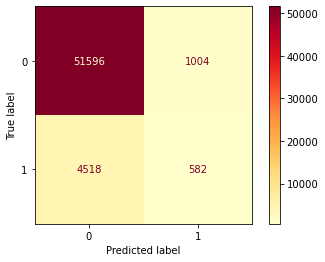

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.7138
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     52600
           1       0.20      0.74      0.31      5100

    accuracy                           0.71     57700
   macro avg       0.58      0.73      0.57     57700
weighted avg       0.90      0.71      0.77     57700

Confusion Matrix:


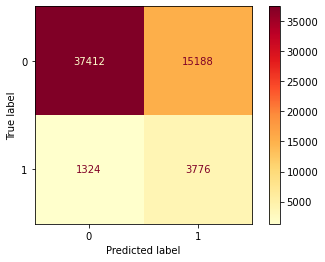

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.7905
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     52600
           1       0.21      0.48      0.29      5100

    accuracy                           0.79     57700
   macro avg       0.57      0.65      0.58     57700
weighted avg       0.88      0.79      0.83     57700

Confusion Matrix:


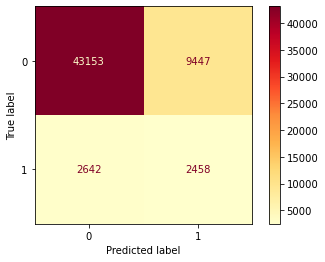

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (Tomek):

Model accuracy score: 0.8996
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52600
           1       0.35      0.15      0.21      5100

    accuracy                           0.90     57700
   macro avg       0.63      0.56      0.58     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


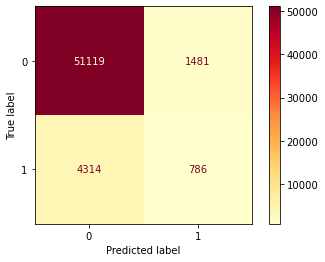

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (SMOTE):

Model accuracy score: 0.7416
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     52600
           1       0.19      0.58      0.28      5100

    accuracy                           0.74     57700
   macro avg       0.57      0.67      0.56     57700
weighted avg       0.88      0.74      0.79     57700

Confusion Matrix:


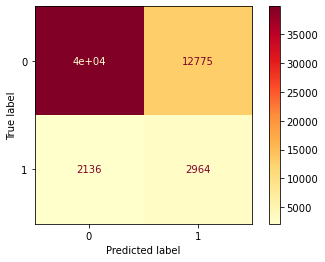

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-5 (NearMiss):

Model accuracy score: 0.3784
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.35      0.50     52600
           1       0.10      0.72      0.17      5100

    accuracy                           0.38     57700
   macro avg       0.51      0.53      0.34     57700
weighted avg       0.85      0.38      0.47     57700

Confusion Matrix:


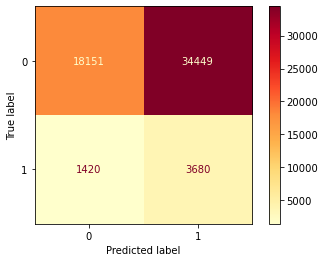

---------------------------------------------------------------------------


In [49]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")


Best result is with Random Under-sampling which gives recall=0.74 and accuracy=71%

## Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_svc = SVC(kernel='linear')
    clf_svc.fit(X_train_list[i], y_train_list[i])
    pred = clf_svc.predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")


---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

